## Garbage Image Classification (CNN - Keras)
dans ce notebook, je vais essayer le processus d'implementation de CNN avec Keras afin de classer les images.
Tout d'abord, nous allons importer des package utiles.
Ensuite, nous allons charger les données, avant de les visualiser et de les pretraiter.


# Import Library

In [ ]:
# TensorFlow and td.keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm
from sklearn.utils import shuffle 
import cv2

print(tf.__version__)

2.7.0


In [ ]:
# setting the path and the labels list for classification of targets on the basis in human understandable form
#Setting up File locations and Checking sample images
class_names = ['cardboard','glass','metal','paper','plastic','trash']

class_names_label =  {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)
print(class_names_label)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


## Loading the Data
Nous devons écrire une fonction load_data qui charge les images et les étiquettes du dossier.


In [ ]:
from tensorflow.python.keras.backend import dtype
# Creation une fontion LOAD_Data()


def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    
    datasets = ['/content/sample_data/garbage/garbage_train', '/content/sample_data/garbage/garbage_test']
 
    output = []
    
    #os.rmdir("/content/sample_data/garbage/garbage_train"+"/.ipynb_checkpoints")
    #os.rmdir("/content/sample_data/garbage/garbage_test"+"/.ipynb_checkpoints")
    #os.rmdir("/content/sample_data/garbage/garbage_test/glass"+"/.ipynb_checkpoints")
 
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output


In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/sample_data/garbage/garbage_train


100%|██████████| 494/494 [00:01<00:00, 351.91it/s]


Loading /content/sample_data/garbage/garbage_test


100%|██████████| 100/100 [00:00<00:00, 340.29it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels)

Let's explore the dataset
We can ask ourselves:

How many training and testing examples do we have ?
What is the size of the images ?
What is the proportion of each observed category ?

In [ ]:
# checking size of individual image

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1980
Number of testing examples: 547
Each image is of size: (150, 150)


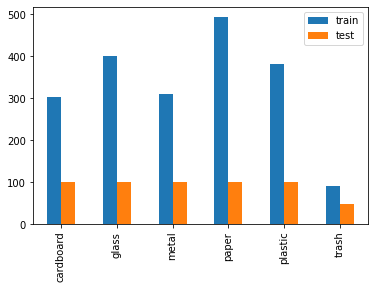

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

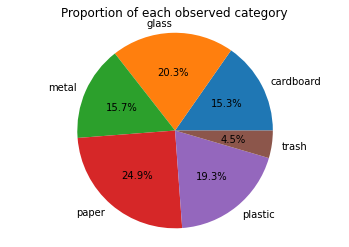

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

 scale the data

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

## Visualize the data¶
We can display a random image from the training set.

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

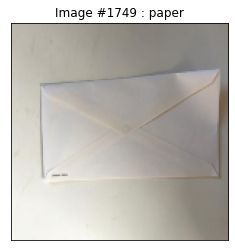

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

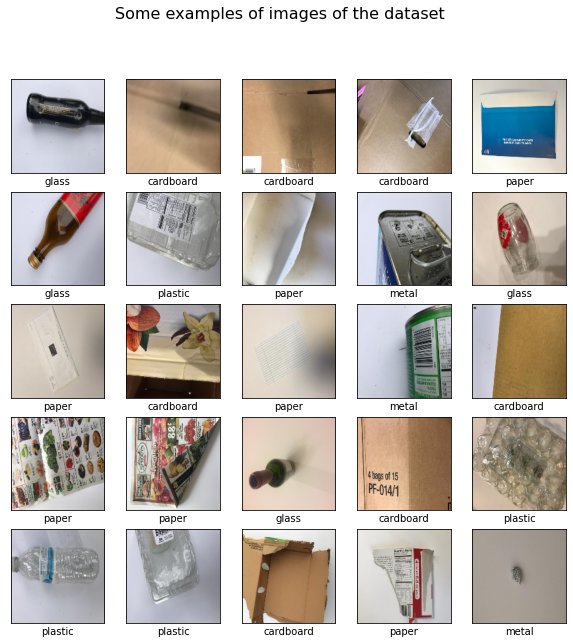

In [ ]:
display_examples(class_names, train_images, train_labels)

##Beginner: Simple Model Creation
Steps are:

Build the model,

*   Élément de liste

*   Élément de liste
*   Élément de liste


*   Élément de liste


Compile the model,
Train / fit the data to the model,
Evaluate the model on the testing set,
Carry out an error analysis of our model.
We can build an easy model composed of different layers such as:

Conv2D: (32 filters of size 3 by 3) The features will be "extracted" from the image.
MaxPooling2D: The images get half sized.
Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
Relu : given a value x, returns max(x, 0).
Softmax: 6 neurons, probability that the image belongs to one of the classes.

*   Élément de liste
*   Élément de liste



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

Then, we can compile it with some parameters such as:

Optimizer: adam = RMSProp + Momentum. What is Momentum and RMSProp ?
Momentum = takes into account past gradient to have a better update.
RMSProp = exponentially weighted average of the squares of past gradients.
Loss function: we use sparse categorical crossentropy for classification, each images belongs to one class only

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

We fit the model to the data from the training set. The neural network will learn by itself the pattern in order to distinguish each category.

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=50, validation_split = 0.2)

Epoch 1/50
13/13 [==============================] - 1s 73ms/step - loss: 0.0284 - accuracy: 0.9968 - val_loss: 1.7802 - val_accuracy: 0.6111
Epoch 2/50
13/13 [==============================] - 1s 63ms/step - loss: 0.0254 - accuracy: 0.9956 - val_loss: 1.8479 - val_accuracy: 0.6288
Epoch 3/50
13/13 [==============================] - 1s 62ms/step - loss: 0.0189 - accuracy: 0.9981 - val_loss: 1.8495 - val_accuracy: 0.6288
Epoch 4/50
13/13 [==============================] - 1s 61ms/step - loss: 0.0225 - accuracy: 0.9975 - val_loss: 2.0100 - val_accuracy: 0.6212
Epoch 5/50
13/13 [==============================] - 1s 62ms/step - loss: 0.0184 - accuracy: 0.9962 - val_loss: 1.9395 - val_accuracy: 0.6338
Epoch 6/50
13/13 [==============================] - 1s 62ms/step - loss: 0.0148 - accuracy: 0.9975 - val_loss: 2.0809 - val_accuracy: 0.6313
Epoch 7/50
13/13 [==============================] - 1s 63ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 2.0316 - val_accuracy: 0.6212
Epoch 8/50
13

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

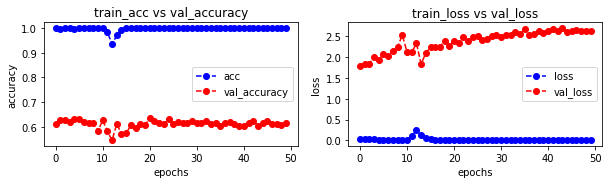

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 3.9034 - accuracy: 0.5503


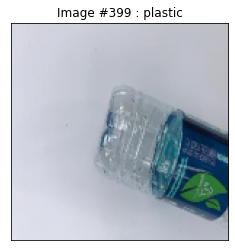

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

Error analysis
We can try to understand on which kind of images the classifier has trouble.

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

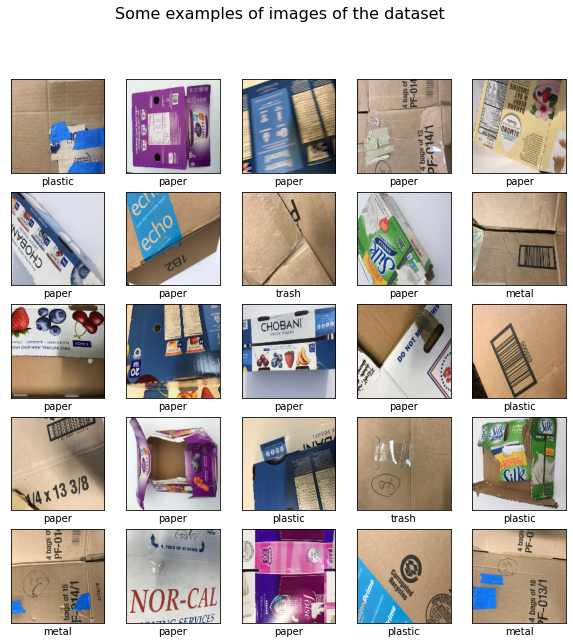

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)